Importação de bibliotecas

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - o preço de venda da propriedade em dólares. Essa é a variável de destino que você está tentando prever.
* MSSubClass: A classe de construção
* MSZoning: A classificação geral de zoneamento
* LotFrontage: Pés lineares de rua conectados à propriedade
* LotArea: Tamanho do lote em pés quadrados
* Street: Tipo de acesso rodoviário (Removido - 100% Pave)
* Alley: Tipo de acesso ao beco
* LotShape: Forma geral da propriedade
* LandContour: Planicidade da propriedade 
* Utilities: Tipo de utilitários disponíveis (Removido - 100% AllPub)
* LotConfig: Configuração do lote
* LandSlope: Inclinação da propriedade
* Neighborhood: Locais físicos dentro dos limites da cidade de Ames
* Condition1: Proximidade à estrada principal ou ferrovia
* Condition2: Proximidade com estrada principal ou via férrea (se houver um segundo)
* BldgType: Tipo de habitação
* HouseStyle: Estilo de habitação
* OverallQual: Material geral e qualidade do acabamento
* OverallCond: Classificação geral da condição
* YearBuilt: Data original de construção
* YearRemodAdd: Data de remodelação
* RoofStyle: Tipo de telhado
* RoofMatl: Material do telhado
* Exterior1st: Cobertura exterior em casa
* Exterior2nd: Cobertura exterior na casa (se houver mais de um material)
* MasVnrType: Tipo de folheado de alvenaria
* MasVnrArea: Área de folheado de alvenaria em pés quadrados
* ExterQual: Qualidade do material exterior
* ExterCond: Condição atual do material no exterior
* Foundation: Tipo de fundação
* BsmtQual: Altura do porão
* BsmtCond: Condição geral do porão
* BsmtExposure: Paredes de porão de paralisação ou de nível de jardim
* BsmtFinType1: Qualidade da área acabada do porão
* BsmtFinSF1: Tipo 1 pés quadrados acabados
* BsmtFinType2: Qualidade da segunda área acabada (se presente)
* BsmtFinSF2: Tipo 2 pés quadrados acabados
* BsmtUnfSF: Pés quadrados inacabados da área do porão
* TotalBsmtSF: Total de pés quadrados da área do porão
* Heating: Tipo de aquecimento
* HeatingQC: Qualidade e condição de aquecimento
* CentralAir: Ar condicionado central
* Electrical: Sistema elétrico
* 1stFlrSF: Pés quadrados do primeiro andar
* 2ndFlrSF: Pés quadrados do segundo andar
* LowQualFinSF: Pés quadrados acabados de baixa qualidade (todos os pisos)
* GrLivArea: Acima de grau (chão) vivendo área pés quadrados
* BsmtFullBath: Casas de banho completas
* BsmtHalfBath: Metade banheiros do porão
* FullBath: Casas de banho completas acima do grau
* HalfBath: Metade banhos acima do grau
* Bedroom: Número de quartos acima do nível da cave
* Kitchen: Número de cozinhas
* KitchenQual: Qualidade da cozinha
* TotRmsAbvGrd: Total de quartos acima do nível (não inclui banheiros)
* Functional: Classificação da funcionalidade inicial
* Fireplaces: Número de lareiras
* FireplaceQu: Qualidade lareira
* GarageType: Localização da garagem
* GarageYrBlt: Garagem ano foi construído
* GarageFinish: Acabamento interior da garagem
* GarageCars: Tamanho da garagem na capacidade do carro
* GarageArea: Tamanho da garagem em pés quadrados
* GarageQual: Garage quality
* GarageCond: Condição de garagem
* PavedDrive: Calçada pavimentada ??
* WoodDeckSF: Área de deck de madeira em pés quadrados
* OpenPorchSF: Área de varanda aberta em pés quadrados
* EnclosedPorch: Área de varanda fechada em pés quadrados
* 3SsnPorch: Área de varanda de três temporadas em pés quadrados
* ScreenPorch: Área de varanda de tela em pés quadrados
* PoolArea: Área da piscina em pés quadrados
* PoolQC: Qualidade da piscina
* Fence: Qualidade da cerca
* MiscFeature: Recurso diverso não coberto em outras categorias
* MiscVal: $ Valor do recurso variado
* MoSold: Mês da venda
* YrSold: Ano da venda
* SaleType: Tipo da venda
* SaleCondition: Condiçoes da venda




In [3]:
file = pd.read_csv('./train.csv')
file.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
file.shape

(1460, 81)

In [5]:
def processar_dados_model_inicial(df):
  dados = df

  if 'SalePrice' in dados.columns:
    df.drop(columns=['SalePrice'], inplace=True)

  # Remocao de campos
  dados.drop(columns=['Id'], inplace=True)

  # Preenchendo o valor NaN do Numpy com a string NA
  dados = dados.fillna('NA')

  # Separa os campos de categoria
  
  dados_sep = dados.to_dict( orient = 'records' )
  vec = DictVectorizer(sparse=False, dtype=int)
  x = vec.fit_transform(dados_sep)

  nomes_colunas = np.array(vec.get_feature_names())
  
  dfPassoVect = pd.DataFrame(x)
  dfPassoVect.columns = nomes_colunas
  dfPassoVect.index = df.index
  return dfPassoVect, nomes_colunas

def processar_dados_model(df):
  label = []
  if 'SalePrice' in df.columns:
    label = df['SalePrice']
    
  dfPassoVect, nomes_colunas = processar_dados_model_inicial(df)

  return dfPassoVect, label, nomes_colunas

Dados após o pre-processamento

In [6]:
dados, label, nomes_colunas = processar_dados_model(file)

In [7]:
dados.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley=Grvl,Alley=NA,Alley=Pave,BedroomAbvGr,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,...,Street=Grvl,Street=Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities=AllPub,Utilities=NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,0,1,0,3,1,0,0,...,0,1,8,856,1,0,0,2003,2003,2008
1,1262,0,0,0,1,0,3,1,0,0,...,0,1,6,1262,1,0,298,1976,1976,2007
2,920,866,0,0,1,0,3,1,0,0,...,0,1,6,920,1,0,0,2001,2002,2008
3,961,756,0,0,1,0,3,1,0,0,...,0,1,7,756,1,0,0,1915,1970,2006
4,1145,1053,0,0,1,0,4,1,0,0,...,0,1,9,1145,1,0,192,2000,2000,2008


### O processo abaixo separa os campos com mais relevância para alcançar o objetivo. Para isso será utilizado o função SelectPercentile do pacote sklearn.feature_selection

In [8]:
# Separa os campos mais relevantes para o objetivo (60% dos campos que melhor explicam a variavel dependente)

fs = SelectPercentile(f_regression, percentile=60)
dados_aux = fs.fit_transform(dados, label)
nomes_novas_colunas=nomes_colunas[fs.get_support(indices=False)]

bar_campos = []
bar_valores = []
#Analisar o score de cada campo
for n,s in zip(nomes_colunas,fs.scores_):
  bar_campos.append(n)
  bar_valores.append(s)


df_conteudo = {'Nome do campo': bar_campos, 'score': bar_valores}
df_SelectPercentile = pd.DataFrame(data=df_conteudo)
df_SelectPercentile = df_SelectPercentile.set_index('Nome do campo')

In [9]:
valor_max = df_SelectPercentile['score'].max()

df_SelectPercentile['perc_score'] = df_SelectPercentile['score'] * 100 / valor_max

df_SelectPercentile = df_SelectPercentile.sort_values(by='perc_score', ascending=False)

df_SelectPercentile.head(30)

,score,perc_score
Nome do campo,,
OverallQual,2436.770591,100.000000
GrLivArea,1470.585010,60.349752
GarageCars,1013.705666,41.600373
GarageArea,926.951287,38.040154
TotalBsmtSF,880.341282,36.127376
1stFlrSF,845.524488,34.698567
ExterQual=TA,774.677019,31.791135
FullBath,668.430296,27.430990
BsmtQual=Ex,642.637454,26.372505


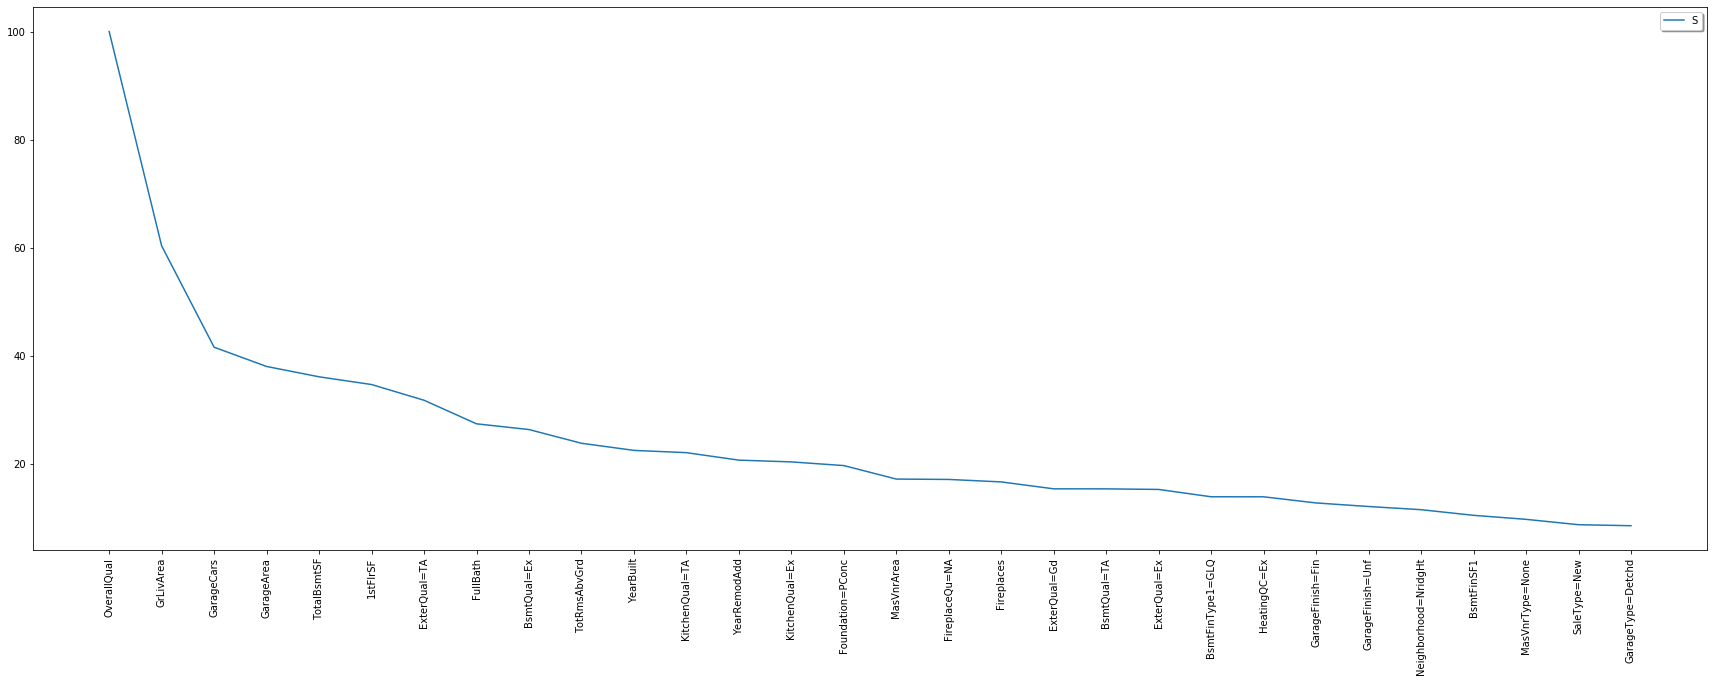

In [10]:
plt.figure(figsize=(30,10))
plt.plot(df_SelectPercentile['perc_score'].head(30))
plt.legend(('SkLearn'), loc='upper right', shadow=True)
plt.xticks(rotation='vertical')
plt.show()


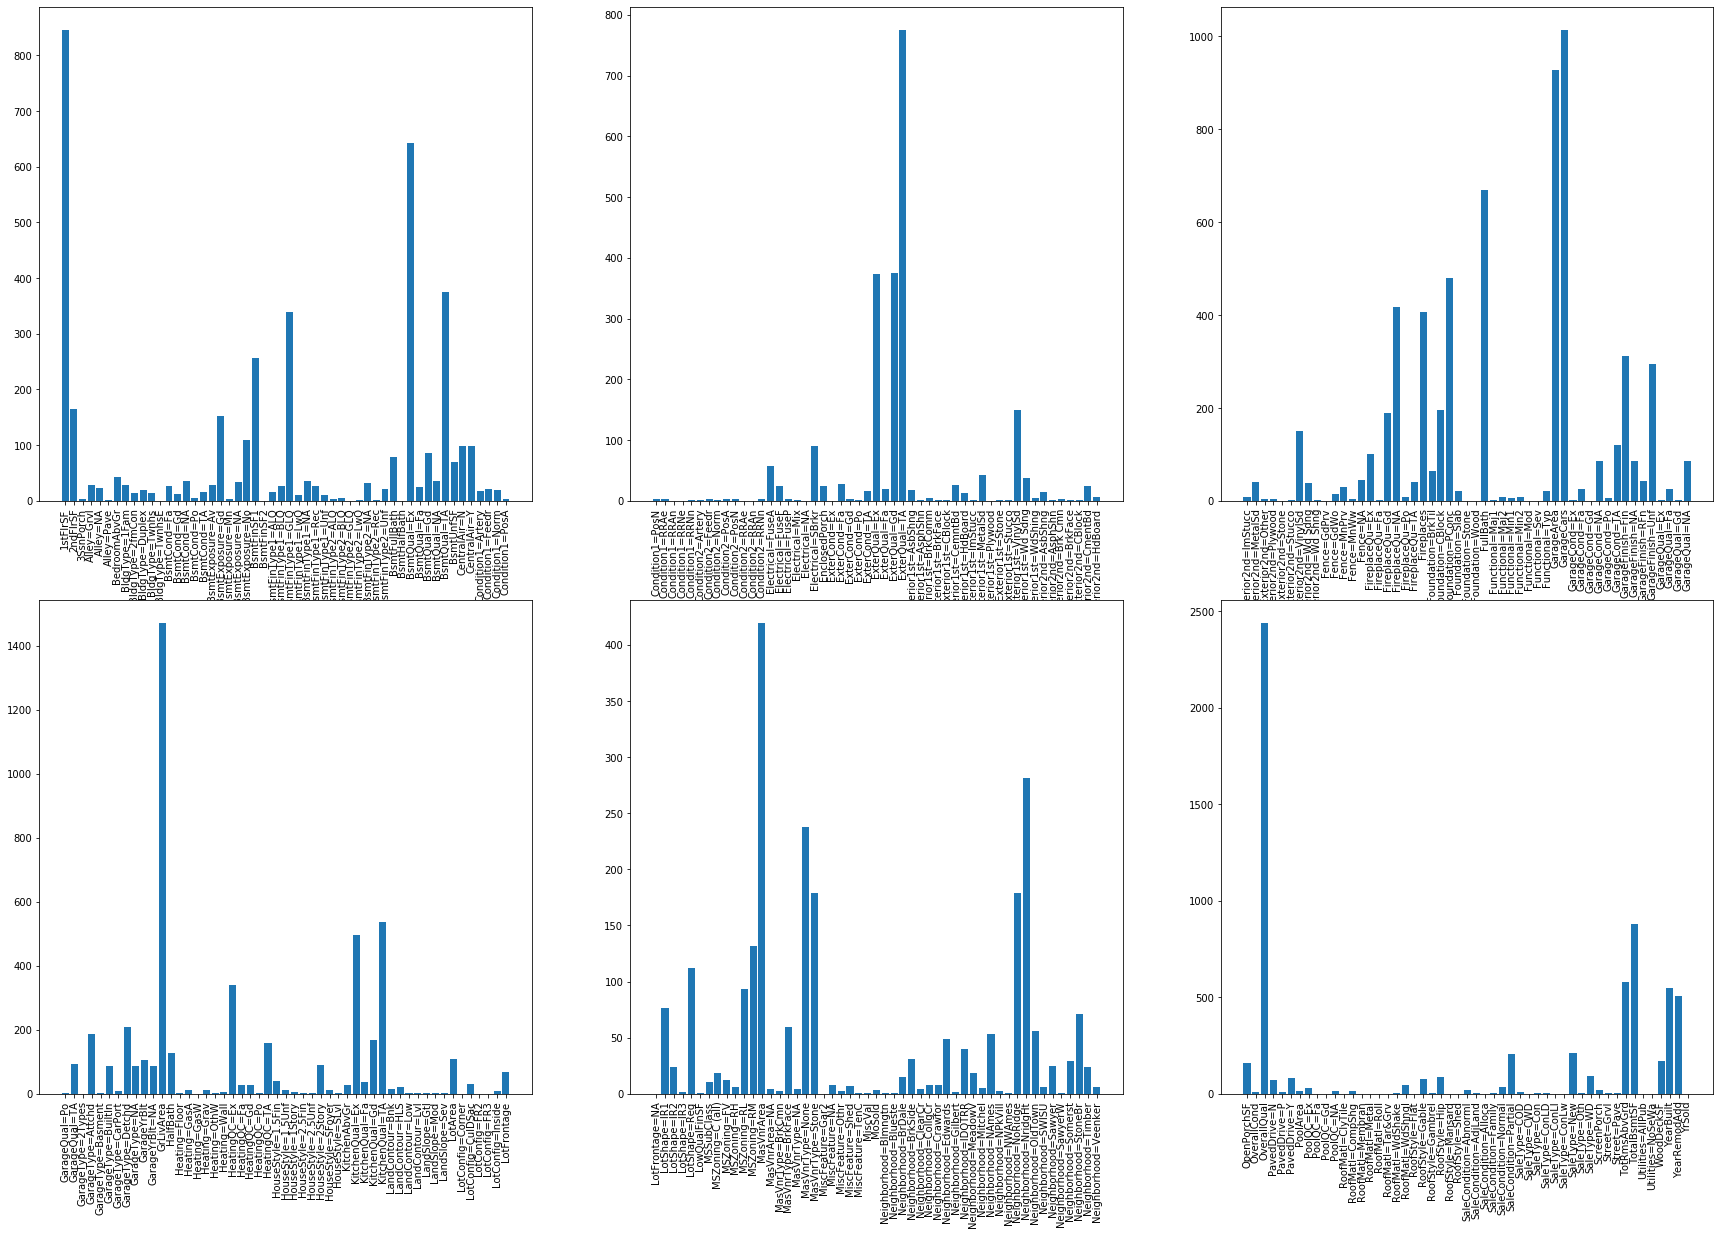

In [11]:
bar_campos = np.array_split(bar_campos, 6)
bar_valores = np.array_split(bar_valores, 6)

plt.figure(figsize=(30,20))

for index in range(6):
  plt.subplot(2,3,index+1)
  plt.xticks(rotation='vertical')
  plt.bar(bar_campos[index], bar_valores[index])

plt.show()

In [12]:
dfPassoPerc = pd.DataFrame(dados_aux)
dfPassoPerc.columns = nomes_novas_colunas
dfPassoPerc.head(5)

,1stFlrSF,2ndFlrSF,Alley=Grvl,Alley=NA,BedroomAbvGr,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=Twnhs,BsmtCond=Fa,...,SaleCondition=Partial,SaleType=COD,SaleType=New,SaleType=WD,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,856,854,0,1,3,1,0,0,0,0,...,0,0,0,1,0,8,856,0,2003,2003
1,1262,0,0,1,3,1,0,0,0,0,...,0,0,0,1,0,6,1262,298,1976,1976
2,920,866,0,1,3,1,0,0,0,0,...,0,0,0,1,0,6,920,0,2001,2002
3,961,756,0,1,3,1,0,0,0,0,...,0,0,0,1,0,7,756,0,1915,1970
4,1145,1053,0,1,4,1,0,0,0,0,...,0,0,0,1,0,9,1145,192,2000,2000


In [13]:
def taxa_acerto(y_true, y_pred):
    # Taxa de acerto atraves do error quadrado
    return r2_score(y_true, y_pred)

def data_predict(modelo, validacao_dados):
    resultado = modelo.predict(validacao_dados)
    return resultado

### Processo de validação do modelo

In [14]:
train, teste, label_train, label_teste = train_test_split(dfPassoPerc, label, test_size=0.10, random_state=0)

In [17]:
modelo = xgb.XGBRegressor()

acerto_xgb = []
K=10
kf = KFold(n_splits=K, shuffle=False, random_state=None)
for train_index, test_index in kf.split(train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = label_train.iloc[train_index], label_train.iloc[test_index]

    modelo.fit(X_train, y_train)

    # Prepara treino
    resultado = data_predict(modelo, X_test)
    acerto_xgb.append(taxa_acerto(y_test, resultado))
    #print("Taxa de acerto na validação cruzada: {0}".format(taxa_acerto(y_test, resultado)))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:32:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:32:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:32:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:32:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:32:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:32:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:32:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:32:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:32:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:32:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
modelo = LinearRegression()

acerto_sklearn = []
K=10
kf = KFold(n_splits=K, shuffle=False, random_state=None)
for train_index, test_index in kf.split(train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = label_train.iloc[train_index], label_train.iloc[test_index]

    modelo.fit(X_train, y_train)

    # Prepara treino
    resultado = data_predict(modelo, X_test)
    acerto_sklearn.append(taxa_acerto(y_test, resultado))

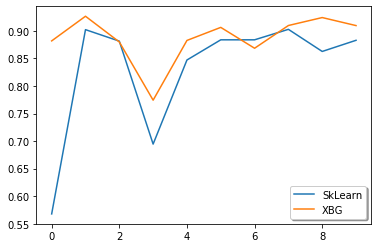

In [19]:
plt.plot(acerto_sklearn)
plt.plot(acerto_xgb)
plt.legend(('SkLearn', 'XBG'), loc='lower right', shadow=True)
plt.show()

In [20]:
print('A media do R2 do alg XGBoost foi de: %3.2f' % (np.array(acerto_xgb).mean()))
print('A media do R2 do alg sklean foi de: %3.2f' % (np.array(acerto_sklearn).mean()))

A media do R2 do alg XGBoost foi de: 0.89
A media do R2 do alg sklean foi de: 0.83


In [21]:
modelo = xgb.XGBRegressor()
modelo.fit(train, label_train)
resultado = data_predict(modelo, teste)
print('A media do R2 do alg XGBoost foi de: %3.2f' % taxa_acerto(label_teste, resultado))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:33:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
A media do R2 do alg XGBoost foi de: 0.87
